In [1]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    f1_score,
    precision_score,
    recall_score,
    accuracy_score
)
warnings.filterwarnings('ignore')

# Quick Overview of Logistic Regression

Y_hat(Z) = z / (1 + exp(z))

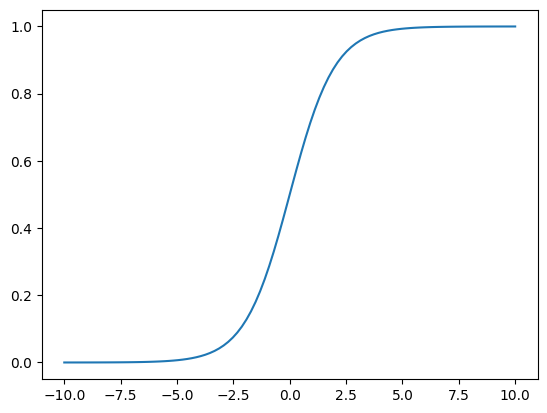

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

X_linespace = np.linspace(-10, 10, 100)
Y_hat = sigmoid(X_linespace)

plt.plot(X_linespace, Y_hat)

### Load Dataset

In [11]:
X_train = np.load('artifacts/X_train.npz')['X_train']
X_test = np.load('artifacts/X_test.npz')['X_train']
Y_train = np.load('artifacts/Y_train.npz')['X_train']
Y_test = np.load('artifacts/Y_test.npz')['X_train']

In [12]:
np.random.seed(42)

In [15]:
model_lr = LogisticRegression(
    random_state=42,
    max_iter = 1000,
)

model_lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [18]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)

Y_proba_train = model_lr.predict_proba(X_train)[:, 1]
Y_proba_test = model_lr.predict_proba(X_test)[:, 1]

### Evaluations

In [24]:
accuracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1 = f1_score(Y_test, Y_hat_test)

In [25]:
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1)

Accuracy:  0.6948474237118559
Precision:  0.33884297520661155
Recall:  0.6542553191489362
F1 Score:  0.44646098003629764


In [28]:
cm = confusion_matrix(Y_test, Y_hat_test)
cm

array([[1143,  480],
       [ 130,  246]])

Text(50.722222222222214, 0.5, 'Actual')

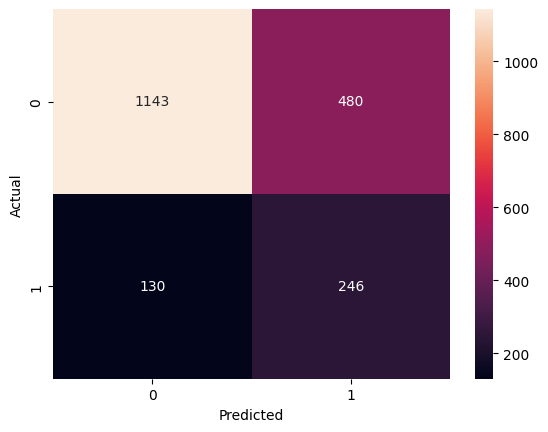

In [34]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')